In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df=pd.read_csv("Under_Armour_pulito.csv", encoding='utf-8')
df

,Unnamed: 0,categoria,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori
0,0,Scarpini Sportivi Under Armour,UNDER ARMOUR,CHARGED COMMIT TR 4 - Scarpe da allenamento - ...,67.99,79.99,https://www.zalando.it/under-armour-charged-co...,CHARGED COMMIT TR 4,Scarpe da allenamento,black
1,1,Scarpini Sportivi Under Armour,UNDER ARMOUR,REIGN 6 - Scarpe da allenamento - anthracite/b...,118.99,139.99,https://www.zalando.it/under-armour-tribase-re...,REIGN 6,Scarpe da allenamento,anthracite/black/steel
2,2,Scarpini Sportivi Under Armour,UNDER ARMOUR,REIGN 6 - Scarpe da allenamento - black,139.99,139.99,https://www.zalando.it/under-armour-tribase-re...,REIGN 6,Scarpe da allenamento,black
3,3,Scarpini Sportivi Under Armour,UNDER ARMOUR,COURT 96 - Scarpe da allenamento - black,69.99,99.99,https://www.zalando.it/under-armour-sport-cour...,COURT 96,Scarpe da allenamento,black
4,4,Scarpini Sportivi Under Armour,UNDER ARMOUR,PHANTOM 4 UNISEX - Scarpe da corsa su strada -...,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,PHANTOM 4 UNISEX,Scarpe da corsa su strada,black
...,...,...,...,...,...,...,...,...,...,...
189,189,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da corsa su strada - white distant gray...,95.97,160.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da corsa su strada,white distant gray halo gray
190,190,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da corsa su strada - white,95.97,160.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da corsa su strada,white
191,191,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da allenamento - grn vert,48.75,48.75,https://www.zalando.it/under-armour-sneakers-b...,Unknown,Scarpe da allenamento,grn vert
192,192,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da camminata - black,100.00,100.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da camminata,black


### Raggruppo per la categoria sportiva e calcolo il prezzo ordinario e il prezzo effetivo per ogni categoria

In [24]:
# raggruppa i dati per categoria di sport
raggruppa_sport = df.groupby('sport')[['prezzo_effettivo', 'prezzo_ordinario']].sum()

In [27]:
raggruppa_sport = raggruppa_sport.sort_values(by=["prezzo_effettivo", "prezzo_ordinario"])
raggruppa_sport

,prezzo_effettivo,prezzo_ordinario
sport,,
Stivali da neve,140.00,140.00
phoenix fire,160.00,160.00
Ciabatte da mare,167.00,167.00
Scarpe da calcio con tacchetti,209.97,249.95
Scarponi da montagna,260.00,260.00
Scarpa da hiking,290.00,290.00
Scarpe da golf,527.95,539.98
Scarpe da trail running,919.91,999.97
Scarpe da camminata,1425.00,1425.00


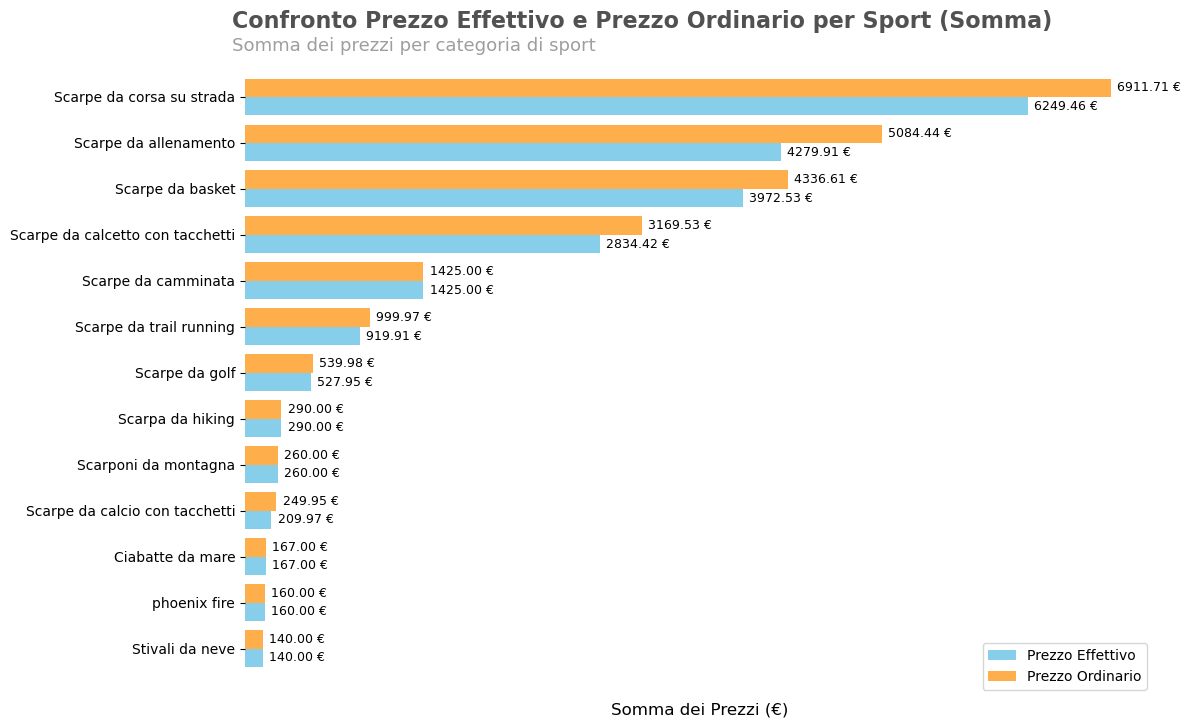

In [34]:
# settiamo il font come sans-serif
plt.rcParams['font.family'] = 'sans-serif'

# settiamo i colori
grey = "#9E9E9E"
grey_text = "#515151"
effective_color = "skyblue"
ordinary_color = "darkorange"

# andiamo a creare la figura e il subplot
fig, ax = plt.subplots(figsize=(12, 8))

# prendiamo il Data per il plot
sports = raggruppa_sport.index
effective_prices = raggruppa_sport['prezzo_effettivo']
ordinary_prices = raggruppa_sport['prezzo_ordinario']

bar_width = 0.4
y_positions = np.arange(len(sports))

ax.barh(y_positions - bar_width/2, effective_prices, height=bar_width, color=effective_color, label="Prezzo Effettivo")
ax.barh(y_positions + bar_width/2, ordinary_prices, height=bar_width, color=ordinary_color, label="Prezzo Ordinario", alpha=0.7)

# Rimozione dei bordi del grafico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Rimozione dei segni sull'asse x
ax.set_xticks(ticks=[])

# Imposta le didascalie dell'asse y
ax.set_yticks(y_positions)
ax.set_yticklabels(sports, fontsize=10)

# aggiungi il titolo
ax.text(-100, len(sports) - 0.5 + 1, 'Confronto Prezzo Effettivo e Prezzo Ordinario per Sport (Somma)', fontsize=16, color=grey_text, fontweight='bold') # Adjusted y position
ax.text(-100, len(sports) - 1 + 1, 'Somma dei prezzi per categoria di sport', fontsize=13, color=grey) # Adjusted y position

# aggiungi le etichette dei prezzi
for i, (effettivo, ordinario) in enumerate(zip(effective_prices, ordinary_prices)):
    ax.text(effettivo + 50, y_positions[i] - bar_width/2, f'{effettivo:.2f} €', va='center', ha='left', fontsize=9, color='black')
    ax.text(ordinario + 50, y_positions[i] + bar_width/2, f'{ordinario:.2f} €', va='center', ha='left', fontsize=9, color='black')

ax.set_xlabel("Somma dei Prezzi (€)", fontsize=12)
ax.legend(fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # aggiusta il layout
plt.show()